In [1]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import os
import numpy as np

In [2]:
def load_img(path):
    img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    img = img.astype('float32') # original is uint16
    img = (img - img.min())/(img.max() - img.min())*255.0 # scale image to [0, 255]
    img = img.astype('uint8')
    return img

def show_img(img, mask=None):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img = clahe.apply(img)
#     plt.figure(figsize=(10,10))
    plt.imshow(img, cmap='bone')
    
    if mask is not None:
        # plt.imshow(np.ma.masked_where(mask!=1, mask), alpha=0.5, cmap='autumn')
        plt.imshow(mask, alpha=0.5)
        handles = [Rectangle((0,0),1,1, color=_c) for _c in [(0.667,0.0,0.0), (0.0,0.667,0.0), (0.0,0.0,0.667)]]
        labels = [ "Large Bowel", "Small Bowel", "Stomach"]
        plt.legend(handles,labels)
    plt.axis('off')

[  0 255]


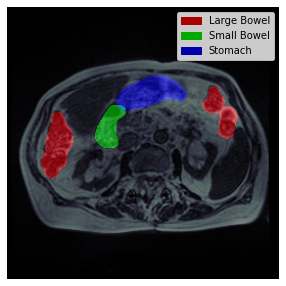

In [3]:
i=10
img_name_list = os.listdir('/home/zhangzr/mmsegmentation_kaggle/data/kaggle_segmentation_clean_data/train')
img = load_img(os.path.join('/home/zhangzr/mmsegmentation_kaggle/data/kaggle_segmentation_clean_data/train',img_name_list[i]))
mask_path = os.path.join('/home/zhangzr/mmsegmentation_kaggle/data/kaggle_segmentation_clean_data/label_3channel', img_name_list[i])
mask = cv2.imread(mask_path, cv2.IMREAD_UNCHANGED)
print(np.unique(mask))
plt.figure(figsize=(5,5))
show_img(img, mask=mask)

In [5]:
origin_img = cv2.imread('../input/uw-madison-gi-tract-image-segmentation/train/case2/case2_day1/scans/slice_0001_266_266_1.50_1.50.png',cv2.IMREAD_UNCHANGED )
print(np.unique(origin_img))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 166 167 170 172 173 174 176 177 178 179 180 181 182 183 184 185
 186 187 189 190 192 195 196 197 198 200 202 203 205 207 208 210 211 212
 215 216 218 219 221 222 223 227 228 229 230 232 233 235 236 237 238 240
 242 243 244 246 247 248 249 250 251 252 255 256 257 258 259 261 262 263
 265 266 268 269 271 273 274 275 276 277 280 281 28